In [1]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
#imp.reload(HelperPI)
import HelperPI
import itertools
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import inv_boxcox
from scipy.stats.distributions import uniform, lognorm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import lightgbm as lgbm
import tensorflow as tf

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [3]:
sql = helper.getSQL(path=r'C:\Users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\Contest_Sql.sql')
base, dtypedf = helper.readData(sql)

INFO:root:Reading data...
INFO:root:Data read complete...
INFO:root:Read: 80000 rows.


                           Count Column Type
0                      LAST_NAME      object
1                 ADDRESS_LINE_1      object
2                 ADDRESS_LINE_2      object
3                      CITY_NAME      object
4                     STATE_CODE      object
5                   COUNTRY_CODE      object
6                            ZIP      object
7                        ZIP_EXT      object
8                      SALES_R12     float64
9                      SALES_R24     float64
10                     SALES_R48     float64
11                     SALES_RLT     float64
12       FISHING_MARINE_SALES_LT     float64
13  CAMPING_WATERSPORTS_SALES_LT     float64
14    HUNTING_HUNTCLOTH_SALES_LT     float64
15             FOOTWEAR_SALES_LT     float64
16             SHOOTING_SALES_LT     float64
17                 GIFT_SALES_LT     float64
18              APPAREL_SALES_LT     float64
19                OTHER_SALES_LT     float64
20                     VISITS_LT     float64
21        

In [4]:
mean = np.mean(base['SALES_TARGET_N12'])
std = np.std(base['SALES_TARGET_N12'])
mean, std

base = base[base['SALES_TARGET_N12'] < mean+std*10]

#base['SALES_TARGET_N12_CBRT'], lmda = stats.boxcox(base['SALES_TARGET_N12'])
base.describe()

,SALES_R12,SALES_R24,SALES_R48,SALES_RLT,FISHING_MARINE_SALES_LT,CAMPING_WATERSPORTS_SALES_LT,HUNTING_HUNTCLOTH_SALES_LT,FOOTWEAR_SALES_LT,SHOOTING_SALES_LT,GIFT_SALES_LT,APPAREL_SALES_LT,OTHER_SALES_LT,VISITS_LT,FISH_MARINE_PERC,CAMPING_WATERSPORTS_PERC,HUNTING_PERC,FOOTWEAR_PERC,SHOOTING_PERC,GIFT_PERC,APPAREL_PERC,OTHER_PERC,DAYS_SINCE_PURCHASE,DAYS_AS_CUSTOMER,REWARDS_CUSTOMER,YOY_TREND,SALES_TARGET_N12
count,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79918.000000,79884.000000,79884.000000,79884.000000,79884.000000,79884.000000,79884.000000,79884.000000,79884.000000,79884.000000,79884.000000,79918.000000,79918.000000,79918.000000
mean,83.438211,166.947852,337.299173,673.749302,186.233366,61.712652,136.877422,48.148130,97.079408,32.163692,100.068954,11.465677,6.967704,0.208038,0.102893,0.152598,0.082279,0.111449,0.114539,0.207903,0.020301,940.035364,1988.243328,0.389987,0.065074,56.560954
std,268.696790,447.460883,790.340124,2067.767806,1233.543211,216.221162,531.486461,166.532271,405.205596,111.094871,291.627383,77.224961,18.934849,0.327831,0.229097,0.270927,0.203322,0.251943,0.250474,0.310039,0.102861,425.711726,1220.294843,0.487750,4.737827,211.668225
min,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,365.000000,365.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,35.960000,49.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,557.000000,1012.000000,0.000000,-0.903597,0.000000
50%,0.000000,29.990000,96.970000,149.075000,0.000000,0.000000,0.000000,0.000000,0.000000,1.690000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005261,0.029226,0.000000,868.000000,1588.000000,0.000000,0.000000,0.000000
75%,55.910000,136.970000,282.677500,518.905000,74.960000,32.450000,59.960000,29.950000,22.990000,20.640000,79.990000,0.000000,6.000000,0.319631,0.076829,0.195071,0.047959,0.051825,0.080616,0.307714,0.000000,1281.250000,2995.000000,1.000000,0.000000,0.000000
max,15636.140000,15636.140000,19812.140000,301392.880000,259267.240000,26007.220000,23464.960000,23373.420000,18372.980000,4299.950000,12876.770000,11112.750000,990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4247.000000,4357.000000,1.000000,565.919463,3261.230000


In [5]:
# plt.hist(base['SALES_TARGET_N12_CBRT'], bins=20)
# plt.show()
# print(lmda)

In [6]:
base['SALES_TARGET_N12'].describe()

count    79918.000000
mean        56.560954
std        211.668225
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3261.230000
Name: SALES_TARGET_N12, dtype: float64

In [7]:
collist = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND','SALES_TARGET_N12']
collist_X = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND']
#collist_y = ['SALES_TARGET_N12_CBRT']
collist_y = ['SALES_TARGET_N12']

In [8]:
train, test = helper.splitData(base[collist], .8)

train, val = helper.splitData(train, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].as_matrix().ravel()
val_X = val[collist_X]
val_y = val[collist_y].as_matrix().ravel()
test_X = test[collist_X]
test_y = test[collist_y].as_matrix().ravel()


interactions = helper.find_iteractions(train_X, train_y)
interactions.to_csv('interactions.csv')

(31967, 26) (31967, 26) (15984, 26)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


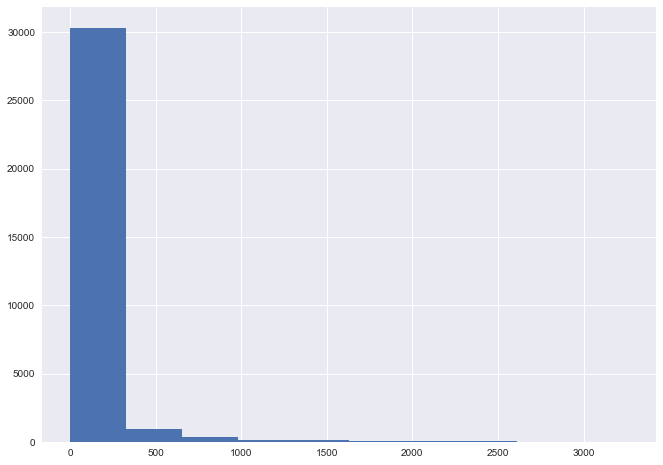

In [9]:
plt.hist(train_y, bins = 10)
plt.show()

In [10]:
collist_X = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND', 'SALES_R12*REWARDS_CUSTOMER']

train_X['SALES_R12*REWARDS_CUSTOMER'] = train_X['SALES_R12']*train_X['REWARDS_CUSTOMER']
val_X['SALES_R12*REWARDS_CUSTOMER'] = val_X['SALES_R12']*val_X['REWARDS_CUSTOMER']
test_X['SALES_R12*REWARDS_CUSTOMER'] = test_X['SALES_R12']*test_X['REWARDS_CUSTOMER']

imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr = imr.fit(train_X)

train_X = pd.DataFrame(imr.transform(train_X.values), columns = collist_X)
val_X = pd.DataFrame(imr.transform(val_X.values), columns = collist_X)
test_X = pd.DataFrame(imr.transform(test_X.values), columns = collist_X)

stdsc = StandardScaler()
stdsc.fit(train_X)

train_X = pd.DataFrame(stdsc.transform(train_X.values), columns = collist_X)
val_X = pd.DataFrame(stdsc.transform(val_X.values), columns = collist_X)
test_X = pd.DataFrame(stdsc.transform(test_X.values), columns = collist_X)

for var in collist_X:
    name = var + '_cbrt'
    train_X[name] = np.cbrt(train_X[var])
    val_X[name] = np.cbrt(val_X[var])
    test_X[name] = np.cbrt(test_X[var])
    name = var + '_sq'
    train_X[name] = np.power(train_X[var], 2)
    val_X[name] = np.power(val_X[var], 2)
    test_X[name] = np.power(test_X[var], 2)
   
    
collist_X_expanded = train_X.columns.values


In [11]:
collist_X_expanded = collist_X_expanded.tolist()

In [12]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]



,column_name,missing_count,missing_ratio


Anderson-Darling: 8338.378815627788 Critical Value: 0.787 
train_y is not normally distributed


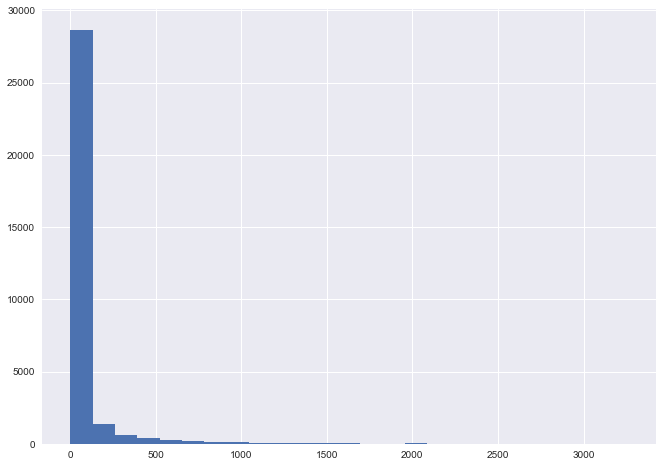

In [13]:
stat, cv, sig = stats.anderson(train_y, 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))
if stat > cv[2]:
    print('train_y is not normally distributed')
else:
    print('train_y is normally distributed')
plt.hist(train_y, bins=25)
plt.show()

In [14]:
matplotlib.rcParams['figure.figsize'] = (5,2)

#collist_X_expanded.remove('VISITS_LT_sqrt')
#collist_X_expanded.remove('YOY_TREND_log')


train_X = train_X[collist_X_expanded]

collist_X_expanded = sorted(collist_X_expanded, key=str.lower)



for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.as_matrix(), train_y)
    print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                                      APPAREL_PERC Corr Coef:   -0.04 - pval:  0.0000
                                 APPAREL_PERC_cbrt Corr Coef:   -0.03 - pval:  0.0000
                                   APPAREL_PERC_sq Corr Coef:   -0.09 - pval:  0.0000
                                  APPAREL_SALES_LT Corr Coef:    0.33 - pval:  0.0000
                             APPAREL_SALES_LT_cbrt Corr Coef:     0.3 - pval:  0.0000
                               APPAREL_SALES_LT_sq Corr Coef:    0.18 - pval:  0.0000
                          CAMPING_WATERSPORTS_PERC Corr Coef:   -0.01 - pval:  0.0192
                     CAMPING_WATERSPORTS_PERC_cbrt Corr Coef:    0.03 - pval:  0.0000
                       CAMPING_WATERSPORTS_PERC_sq Corr Coef:   -0.05 - pval:  0.0000
                      CAMPING_WATERSPORTS_SALES_LT Corr Coef:    0.27 - pval:  0.0000
                 CAMPING_WATERSPORTS_SALES_LT_cbrt Corr Coef:    0.31 - pval:  0.0000
                   CAMPING_WATERSPORTS_SALES_LT_sq Cor

In [15]:
collist_X_expanded = ['APPAREL_SALES_LT','CAMPING_WATERSPORTS_SALES_LT_cbrt','DAYS_AS_CUSTOMER','DAYS_SINCE_PURCHASE',
                      'FISHING_MARINE_SALES_LT_cbrt','FOOTWEAR_SALES_LT_cbrt','GIFT_SALES_LT_cbrt',
                      'HUNTING_HUNTCLOTH_SALES_LT_cbrt','OTHER_SALES_LT_cbrt','REWARDS_CUSTOMER','SALES_R12',
                      'SALES_R12*REWARDS_CUSTOMER','SALES_R24','SALES_RLT_cbrt','SHOOTING_SALES_LT_cbrt','VISITS_LT_cbrt',
                      'YOY_TREND_cbrt']
train_X = train_X[collist_X_expanded]

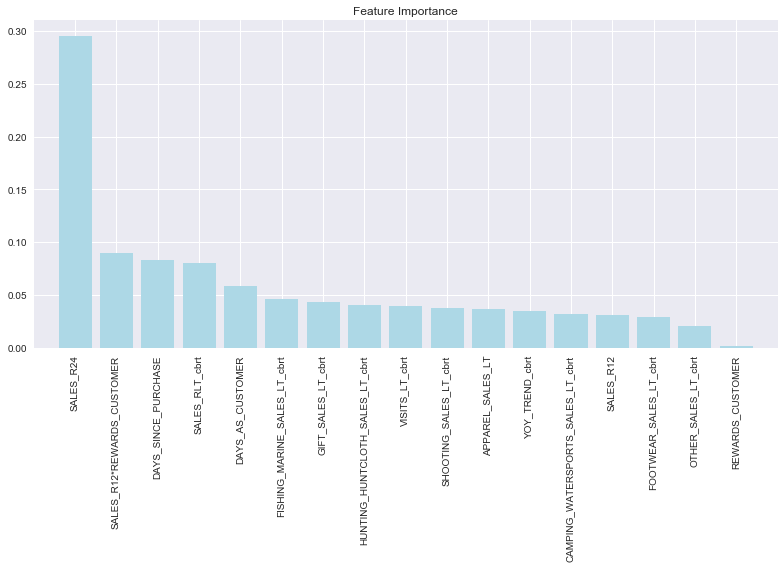

In [16]:
feat_labels = np.asarray(collist_X_expanded)

forests = RandomForestRegressor(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(train_X2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
#                                       importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [17]:
slct = SelectKBest(f_regression, k=15)
slct.fit(train_X, train_y)
selected = slct.get_support()
feat_labels2 = feat_labels[selected]
feat_labels2

array(['APPAREL_SALES_LT', 'CAMPING_WATERSPORTS_SALES_LT_cbrt',
       'DAYS_SINCE_PURCHASE', 'FISHING_MARINE_SALES_LT_cbrt',
       'FOOTWEAR_SALES_LT_cbrt', 'GIFT_SALES_LT_cbrt',
       'HUNTING_HUNTCLOTH_SALES_LT_cbrt', 'OTHER_SALES_LT_cbrt',
       'REWARDS_CUSTOMER', 'SALES_R12', 'SALES_R12*REWARDS_CUSTOMER',
       'SALES_R24', 'SALES_RLT_cbrt', 'SHOOTING_SALES_LT_cbrt',
       'VISITS_LT_cbrt'],
      dtype='<U33')

### Calculate Feature Correlations and VIF scores

    VIF Factor                            feature
10    4.159704                          SALES_R24
9     3.516673         SALES_R12*REWARDS_CUSTOMER
6     2.482795    HUNTING_HUNTCLOTH_SALES_LT_cbrt
3     2.132884       FISHING_MARINE_SALES_LT_cbrt
1     2.126428  CAMPING_WATERSPORTS_SALES_LT_cbrt
4     2.059896             FOOTWEAR_SALES_LT_cbrt
11    2.045911             SHOOTING_SALES_LT_cbrt
5     2.043540                 GIFT_SALES_LT_cbrt
7     1.943284                OTHER_SALES_LT_cbrt
0     1.464372                   APPAREL_SALES_LT
8     1.312990                   REWARDS_CUSTOMER
2     1.175343                DAYS_SINCE_PURCHASE


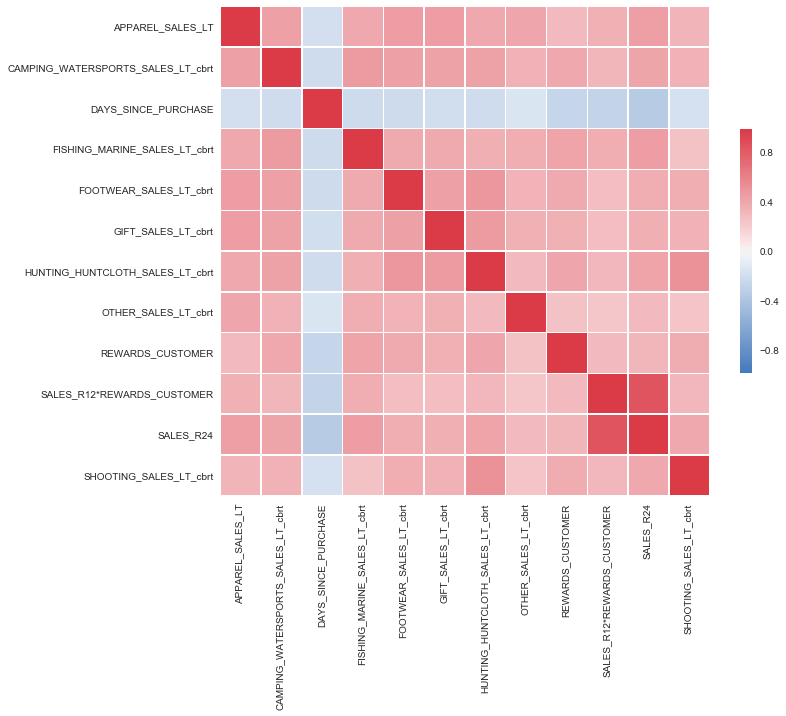

In [18]:
collist_X2 = ['APPAREL_SALES_LT', 'CAMPING_WATERSPORTS_SALES_LT_cbrt',
       'DAYS_SINCE_PURCHASE', 'FISHING_MARINE_SALES_LT_cbrt',
       'FOOTWEAR_SALES_LT_cbrt', 'GIFT_SALES_LT_cbrt',
       'HUNTING_HUNTCLOTH_SALES_LT_cbrt', 'OTHER_SALES_LT_cbrt',
       'REWARDS_CUSTOMER', 'SALES_R12*REWARDS_CUSTOMER',
       'SALES_R24', 'SHOOTING_SALES_LT_cbrt']

#collist_X2 = feat_labels2.tolist()

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


print(helper.calc_VIFs(train_X2))

In [21]:
import statsmodels.api as sm

mod = sm.OLS(train_y, train_X2)
res = mod.fit()
print(res.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     1245.
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:34:08   Log-Likelihood:            -2.1185e+05
No. Observations:               31967   AIC:                         4.237e+05
Df Residuals:                   31955   BIC:                         4.238e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
APPARE

In [19]:
param_test1 = {
     'learning_rate':uniform(0.01,0.09),
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:linear'],
     'gamma':lognorm(0.1, 1.0)
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=200,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)    

Parameter search took 910.70 seconds for 200 candidate parameter settings.
Best Mean validation score: -29125.531 (std: 702.243)
Parameters: {'colsample_bytree': 0.74915841630954527, 'gamma': 2.1412920263740451, 'learning_rate': 0.027130928644970832, 'max_depth': 5, 'min_child_weight': 2, 'objective': 'reg:linear', 'reg_alpha': 0.15951002508544501, 'reg_lambda': 0.50005212839215185, 'subsample': 0.6491608918977928}


In [24]:

tuned_model = xgb.XGBRegressor( 
                        learning_rate = 0.035,
                        n_estimators = 84,
                        max_depth = 5,
                        min_child_weight = 7,
                        subsample = 0.66,
                        colsample_bytree = 0.83,
                        objective = 'reg:linear',
                        reg_alpha= 0.6360,
                        reg_lambda = 0.5957,
                        gamma = 1.9392,
                        seed = 27)
xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

# fig, ax = plt.subplots(figsize=(12,18))
# xgb.plot_importance(xgbmodel, height=0.8, ax=ax)
# plt.show()

[0]	validation_0-rmse:198.499	validation_1-rmse:193.019	validation_2-rmse:188.309
Multiple eval metrics have been passed: 'validation_2-rmse' will be used for early stopping.

Will train until validation_2-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:195.823	validation_1-rmse:190.582	validation_2-rmse:186.02
[2]	validation_0-rmse:193.321	validation_1-rmse:188.314	validation_2-rmse:183.868
[3]	validation_0-rmse:190.841	validation_1-rmse:186.104	validation_2-rmse:181.808
[4]	validation_0-rmse:188.65	validation_1-rmse:184.107	validation_2-rmse:179.946
[5]	validation_0-rmse:186.441	validation_1-rmse:182.162	validation_2-rmse:178.072
[6]	validation_0-rmse:184.306	validation_1-rmse:180.334	validation_2-rmse:176.399
[7]	validation_0-rmse:182.282	validation_1-rmse:178.534	validation_2-rmse:174.724
[8]	validation_0-rmse:180.555	validation_1-rmse:177.042	validation_2-rmse:173.329
[9]	validation_0-rmse:178.726	validation_1-rmse:175.526	validation_2-rmse:171.829
[10]	validation_0-rmse

In [25]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.460036382575
RMSE Train: 142.47207215577004
RMSE Val: 154.12162836319126
RMSE Test: 150.94000762574947
MAE Train: 56.216003563
MAE Val: 59.300729884
MAE Test: 58.4513111489


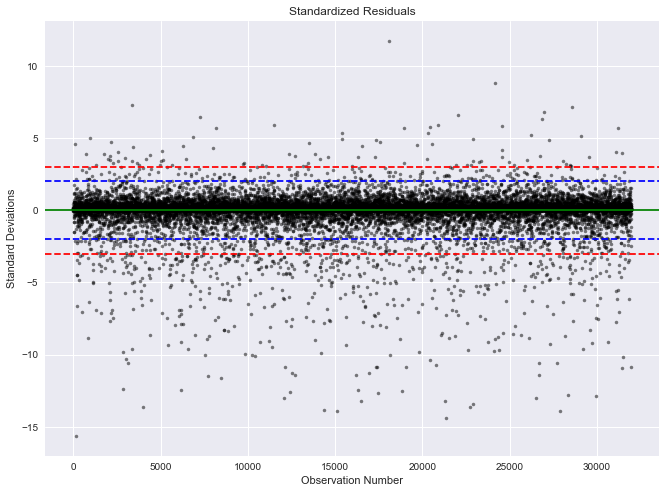

In [26]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [27]:
param_test1 = {
     'boosting_type':['dart','gbdt'],
     'num_leaves':list(range(10,40)),
     'max_depth':[-1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
     'objective':[None, 'regression','regression_l1'],
     'min_split_gain':uniform(0.0, 1.0),
     'min_child_weight':uniform(0.0, 1.0),
     'subsample':uniform(0.1, 0.9),
     'colsample_bytree':uniform(0.1, 0.9),
     'reg_alpha': uniform(0.0, 10.0),
     'reg_lambda': uniform(0.0, 10.0),
     'learning_rate':uniform(0.01,0.09),
     'silent':[True]
}


gsearch1 = RandomizedSearchCV(estimator = lgbm.LGBMRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=200,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)   

Parameter search took 303.88 seconds for 200 candidate parameter settings.
Best Mean validation score: -26551.174 (std: 2654.345)
Parameters: {'boosting_type': 'gbdt', 'colsample_bytree': 0.9348195085465445, 'learning_rate': 0.098159025800079014, 'max_depth': 6, 'min_child_weight': 0.38508759989028229, 'min_split_gain': 0.80846661451749824, 'num_leaves': 27, 'objective': None, 'reg_alpha': 9.7371847416400108, 'reg_lambda': 6.6741140600825721, 'silent': True, 'subsample': 0.96639663600070069}


In [30]:
lgbmmodel = lgbm.LGBMRegressor( 
                        boosting_type='gbdt',
                        colsample_bytree=0.9348,
                        learning_rate=0.01,
                        max_depth=6, 
                        min_child_weight=0.3851,
                        min_split_gain=0.8085,
                        num_leaves=27,
                        objective=None,
                        reg_alpha=9.7372,
                        reg_lambda=6.6741,
                        subsample=0.9664,
                        n_estimators=263)
lgbmmodel.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

[1]	valid_0's rmse: 193.227	valid_1's rmse: 187.795	valid_2's rmse: 183.262
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 192.58	valid_1's rmse: 187.186	valid_2's rmse: 182.71
[3]	valid_0's rmse: 191.937	valid_1's rmse: 186.586	valid_2's rmse: 182.161
[4]	valid_0's rmse: 191.324	valid_1's rmse: 186.006	valid_2's rmse: 181.615
[5]	valid_0's rmse: 190.702	valid_1's rmse: 185.424	valid_2's rmse: 181.08
[6]	valid_0's rmse: 190.088	valid_1's rmse: 184.85	valid_2's rmse: 180.557
[7]	valid_0's rmse: 189.485	valid_1's rmse: 184.282	valid_2's rmse: 180.041
[8]	valid_0's rmse: 188.91	valid_1's rmse: 183.756	valid_2's rmse: 179.542
[9]	valid_0's rmse: 188.323	valid_1's rmse: 183.222	valid_2's rmse: 179.051
[10]	valid_0's rmse: 187.741	valid_1's rmse: 182.685	valid_2's rmse: 178.56
[11]	valid_0's rmse: 187.173	valid_1's rmse: 182.16	valid_2's rmse: 178.08
[12]	valid_0's rmse: 186.613	valid_1's rmse: 181.643	valid_2's rmse: 177.605
[13]	valid_0's rmse: 186.076	v

[150]	valid_0's rmse: 152.239	valid_1's rmse: 154.802	valid_2's rmse: 152.353
[151]	valid_0's rmse: 152.144	valid_1's rmse: 154.762	valid_2's rmse: 152.316
[152]	valid_0's rmse: 152.052	valid_1's rmse: 154.721	valid_2's rmse: 152.274
[153]	valid_0's rmse: 151.951	valid_1's rmse: 154.681	valid_2's rmse: 152.226
[154]	valid_0's rmse: 151.855	valid_1's rmse: 154.642	valid_2's rmse: 152.187
[155]	valid_0's rmse: 151.758	valid_1's rmse: 154.607	valid_2's rmse: 152.152
[156]	valid_0's rmse: 151.668	valid_1's rmse: 154.57	valid_2's rmse: 152.113
[157]	valid_0's rmse: 151.589	valid_1's rmse: 154.54	valid_2's rmse: 152.071
[158]	valid_0's rmse: 151.495	valid_1's rmse: 154.5	valid_2's rmse: 152.027
[159]	valid_0's rmse: 151.403	valid_1's rmse: 154.465	valid_2's rmse: 151.981
[160]	valid_0's rmse: 151.312	valid_1's rmse: 154.438	valid_2's rmse: 151.939
[161]	valid_0's rmse: 151.224	valid_1's rmse: 154.407	valid_2's rmse: 151.91
[162]	valid_0's rmse: 151.133	valid_1's rmse: 154.38	valid_2's rmse: 

[257]	valid_0's rmse: 145.149	valid_1's rmse: 153.29	valid_2's rmse: 150.339
[258]	valid_0's rmse: 145.102	valid_1's rmse: 153.294	valid_2's rmse: 150.338
[259]	valid_0's rmse: 145.059	valid_1's rmse: 153.296	valid_2's rmse: 150.329
[260]	valid_0's rmse: 145.014	valid_1's rmse: 153.292	valid_2's rmse: 150.325
[261]	valid_0's rmse: 144.966	valid_1's rmse: 153.292	valid_2's rmse: 150.322
[262]	valid_0's rmse: 144.917	valid_1's rmse: 153.287	valid_2's rmse: 150.319
[263]	valid_0's rmse: 144.873	valid_1's rmse: 153.291	valid_2's rmse: 150.313


LGBMRegressor(boosting_type='gbdt', colsample_bytree=0.9348,
       learning_rate=0.01, max_bin=255, max_depth=6, min_child_samples=10,
       min_child_weight=0.3851, min_split_gain=0.8085, n_estimators=263,
       n_jobs=-1, num_leaves=27, objective=None, random_state=0,
       reg_alpha=9.7372, reg_lambda=6.6741, silent=True, subsample=0.9664,
       subsample_for_bin=50000, subsample_freq=1)

In [72]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, lgbmmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, lgbmmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, lgbmmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))


The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.441687465798
RMSE Train: 144.8725754292381
RMSE Val: 153.2910242796636
RMSE Test: 150.31320485939884
MAE Train: 59.2165665915
MAE Val: 61.4960366472
MAE Test: 60.6210510944


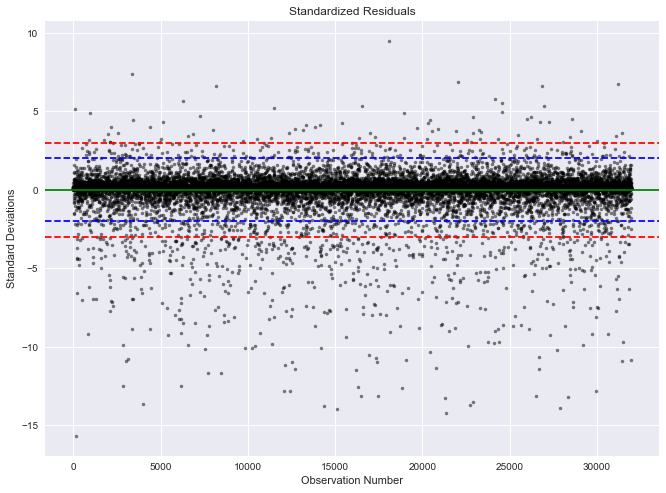

In [32]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [34]:
train_X2.shape[1:]

(12,)

In [115]:
## TENSORFLOW

feature_columns = [tf.feature_column.numeric_column('x', shape=train_X2.shape[1:])]

regressor = tf.estimator.DNNRegressor(
    feature_columns = feature_columns, 
    hidden_units=[12,8,4])

train_input_fn = tf.estimator.inputs.numpy_input_fn(x={'x': train_X2.values}, y=train_y, batch_size=1000, num_epochs=None,shuffle=True)
regressor.train(input_fn= train_input_fn, 
                steps=10000)


INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Temp\\tmpvkizmml2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000026220FD0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Temp\\tmpvkizmml2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000026220FD0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into C:\Temp\tmpvkizmml2\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into C:\Temp\tmpvkizmml2\model.ckpt.


INFO:tensorflow:loss = 2.17237e+07, step = 1


INFO:tensorflow:loss = 2.17237e+07, step = 1


INFO:tensorflow:global_step/sec: 250


INFO:tensorflow:global_step/sec: 250


INFO:tensorflow:loss = 3.9901e+07, step = 101 (0.402 sec)


INFO:tensorflow:loss = 3.9901e+07, step = 101 (0.402 sec)


INFO:tensorflow:global_step/sec: 259.067


INFO:tensorflow:global_step/sec: 259.067


INFO:tensorflow:loss = 1.52165e+07, step = 201 (0.387 sec)


INFO:tensorflow:loss = 1.52165e+07, step = 201 (0.387 sec)


INFO:tensorflow:global_step/sec: 227.273


INFO:tensorflow:global_step/sec: 227.273


INFO:tensorflow:loss = 2.33861e+07, step = 301 (0.441 sec)


INFO:tensorflow:loss = 2.33861e+07, step = 301 (0.441 sec)


INFO:tensorflow:global_step/sec: 222.717


INFO:tensorflow:global_step/sec: 222.717


INFO:tensorflow:loss = 2.15171e+07, step = 401 (0.449 sec)


INFO:tensorflow:loss = 2.15171e+07, step = 401 (0.449 sec)


INFO:tensorflow:global_step/sec: 220.264


INFO:tensorflow:global_step/sec: 220.264


INFO:tensorflow:loss = 1.72044e+07, step = 501 (0.455 sec)


INFO:tensorflow:loss = 1.72044e+07, step = 501 (0.455 sec)


INFO:tensorflow:global_step/sec: 209.644


INFO:tensorflow:global_step/sec: 209.644


INFO:tensorflow:loss = 2.81847e+07, step = 601 (0.476 sec)


INFO:tensorflow:loss = 2.81847e+07, step = 601 (0.476 sec)


INFO:tensorflow:global_step/sec: 234.192


INFO:tensorflow:global_step/sec: 234.192


INFO:tensorflow:loss = 1.87219e+07, step = 701 (0.426 sec)


INFO:tensorflow:loss = 1.87219e+07, step = 701 (0.426 sec)


INFO:tensorflow:global_step/sec: 245.098


INFO:tensorflow:global_step/sec: 245.098


INFO:tensorflow:loss = 2.07112e+07, step = 801 (0.408 sec)


INFO:tensorflow:loss = 2.07112e+07, step = 801 (0.408 sec)


INFO:tensorflow:global_step/sec: 217.865


INFO:tensorflow:global_step/sec: 217.865


INFO:tensorflow:loss = 3.83267e+07, step = 901 (0.459 sec)


INFO:tensorflow:loss = 3.83267e+07, step = 901 (0.459 sec)


INFO:tensorflow:global_step/sec: 242.131


INFO:tensorflow:global_step/sec: 242.131


INFO:tensorflow:loss = 2.20991e+07, step = 1001 (0.413 sec)


INFO:tensorflow:loss = 2.20991e+07, step = 1001 (0.413 sec)


INFO:tensorflow:global_step/sec: 230.947


INFO:tensorflow:global_step/sec: 230.947


INFO:tensorflow:loss = 1.98671e+07, step = 1101 (0.442 sec)


INFO:tensorflow:loss = 1.98671e+07, step = 1101 (0.442 sec)


INFO:tensorflow:global_step/sec: 220.751


INFO:tensorflow:global_step/sec: 220.751


INFO:tensorflow:loss = 2.67226e+07, step = 1201 (0.444 sec)


INFO:tensorflow:loss = 2.67226e+07, step = 1201 (0.444 sec)


INFO:tensorflow:global_step/sec: 237.53


INFO:tensorflow:global_step/sec: 237.53


INFO:tensorflow:loss = 1.40596e+07, step = 1301 (0.421 sec)


INFO:tensorflow:loss = 1.40596e+07, step = 1301 (0.421 sec)


INFO:tensorflow:global_step/sec: 280.899


INFO:tensorflow:global_step/sec: 280.899


INFO:tensorflow:loss = 3.96883e+07, step = 1401 (0.355 sec)


INFO:tensorflow:loss = 3.96883e+07, step = 1401 (0.355 sec)


INFO:tensorflow:global_step/sec: 272.479


INFO:tensorflow:global_step/sec: 272.479


INFO:tensorflow:loss = 2.24481e+07, step = 1501 (0.367 sec)


INFO:tensorflow:loss = 2.24481e+07, step = 1501 (0.367 sec)


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:loss = 2.10841e+07, step = 1601 (0.364 sec)


INFO:tensorflow:loss = 2.10841e+07, step = 1601 (0.364 sec)


INFO:tensorflow:global_step/sec: 278.551


INFO:tensorflow:global_step/sec: 278.551


INFO:tensorflow:loss = 3.41267e+07, step = 1701 (0.360 sec)


INFO:tensorflow:loss = 3.41267e+07, step = 1701 (0.360 sec)


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:loss = 3.00805e+07, step = 1801 (0.362 sec)


INFO:tensorflow:loss = 3.00805e+07, step = 1801 (0.362 sec)


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:loss = 2.78741e+07, step = 1901 (0.360 sec)


INFO:tensorflow:loss = 2.78741e+07, step = 1901 (0.360 sec)


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:loss = 2.13256e+07, step = 2001 (0.360 sec)


INFO:tensorflow:loss = 2.13256e+07, step = 2001 (0.360 sec)


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:loss = 1.52639e+07, step = 2101 (0.362 sec)


INFO:tensorflow:loss = 1.52639e+07, step = 2101 (0.362 sec)


INFO:tensorflow:global_step/sec: 257.069


INFO:tensorflow:global_step/sec: 257.069


INFO:tensorflow:loss = 2.43512e+07, step = 2201 (0.389 sec)


INFO:tensorflow:loss = 2.43512e+07, step = 2201 (0.389 sec)


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:loss = 2.3566e+07, step = 2301 (0.362 sec)


INFO:tensorflow:loss = 2.3566e+07, step = 2301 (0.362 sec)


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:loss = 3.96292e+07, step = 2401 (0.361 sec)


INFO:tensorflow:loss = 3.96292e+07, step = 2401 (0.361 sec)


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:loss = 1.8715e+07, step = 2501 (0.361 sec)


INFO:tensorflow:loss = 1.8715e+07, step = 2501 (0.361 sec)


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:loss = 3.48558e+07, step = 2601 (0.363 sec)


INFO:tensorflow:loss = 3.48558e+07, step = 2601 (0.363 sec)


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:loss = 2.98282e+07, step = 2701 (0.361 sec)


INFO:tensorflow:loss = 2.98282e+07, step = 2701 (0.361 sec)


INFO:tensorflow:global_step/sec: 278.551


INFO:tensorflow:global_step/sec: 278.551


INFO:tensorflow:loss = 1.85979e+07, step = 2801 (0.360 sec)


INFO:tensorflow:loss = 1.85979e+07, step = 2801 (0.360 sec)


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:loss = 2.12092e+07, step = 2901 (0.363 sec)


INFO:tensorflow:loss = 2.12092e+07, step = 2901 (0.363 sec)


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:loss = 2.74941e+07, step = 3001 (0.363 sec)


INFO:tensorflow:loss = 2.74941e+07, step = 3001 (0.363 sec)


INFO:tensorflow:global_step/sec: 270.27


INFO:tensorflow:global_step/sec: 270.27


INFO:tensorflow:loss = 1.90924e+07, step = 3101 (0.369 sec)


INFO:tensorflow:loss = 1.90924e+07, step = 3101 (0.369 sec)


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:loss = 3.24869e+07, step = 3201 (0.363 sec)


INFO:tensorflow:loss = 3.24869e+07, step = 3201 (0.363 sec)


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:loss = 2.28157e+07, step = 3301 (0.359 sec)


INFO:tensorflow:loss = 2.28157e+07, step = 3301 (0.359 sec)


INFO:tensorflow:global_step/sec: 267.38


INFO:tensorflow:global_step/sec: 267.38


INFO:tensorflow:loss = 2.51416e+07, step = 3401 (0.376 sec)


INFO:tensorflow:loss = 2.51416e+07, step = 3401 (0.376 sec)


INFO:tensorflow:global_step/sec: 222.222


INFO:tensorflow:global_step/sec: 222.222


INFO:tensorflow:loss = 2.00824e+07, step = 3501 (0.449 sec)


INFO:tensorflow:loss = 2.00824e+07, step = 3501 (0.449 sec)


INFO:tensorflow:global_step/sec: 273.972


INFO:tensorflow:global_step/sec: 273.972


INFO:tensorflow:loss = 2.06591e+07, step = 3601 (0.364 sec)


INFO:tensorflow:loss = 2.06591e+07, step = 3601 (0.364 sec)


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:loss = 3.74172e+07, step = 3701 (0.361 sec)


INFO:tensorflow:loss = 3.74172e+07, step = 3701 (0.361 sec)


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:loss = 2.23628e+07, step = 3801 (0.358 sec)


INFO:tensorflow:loss = 2.23628e+07, step = 3801 (0.358 sec)


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:loss = 2.82732e+07, step = 3901 (0.360 sec)


INFO:tensorflow:loss = 2.82732e+07, step = 3901 (0.360 sec)


INFO:tensorflow:global_step/sec: 263.852


INFO:tensorflow:global_step/sec: 263.852


INFO:tensorflow:loss = 3.07963e+07, step = 4001 (0.379 sec)


INFO:tensorflow:loss = 3.07963e+07, step = 4001 (0.379 sec)


INFO:tensorflow:global_step/sec: 272.479


INFO:tensorflow:global_step/sec: 272.479


INFO:tensorflow:loss = 2.42828e+07, step = 4101 (0.367 sec)


INFO:tensorflow:loss = 2.42828e+07, step = 4101 (0.367 sec)


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:loss = 2.70048e+07, step = 4201 (0.362 sec)


INFO:tensorflow:loss = 2.70048e+07, step = 4201 (0.362 sec)


INFO:tensorflow:global_step/sec: 280.112


INFO:tensorflow:global_step/sec: 280.112


INFO:tensorflow:loss = 2.27345e+07, step = 4301 (0.358 sec)


INFO:tensorflow:loss = 2.27345e+07, step = 4301 (0.358 sec)


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:loss = 1.46387e+07, step = 4401 (0.360 sec)


INFO:tensorflow:loss = 1.46387e+07, step = 4401 (0.360 sec)


INFO:tensorflow:global_step/sec: 250.626


INFO:tensorflow:global_step/sec: 250.626


INFO:tensorflow:loss = 2.49215e+07, step = 4501 (0.404 sec)


INFO:tensorflow:loss = 2.49215e+07, step = 4501 (0.404 sec)


INFO:tensorflow:global_step/sec: 262.467


INFO:tensorflow:global_step/sec: 262.467


INFO:tensorflow:loss = 2.85076e+07, step = 4601 (0.376 sec)


INFO:tensorflow:loss = 2.85076e+07, step = 4601 (0.376 sec)


INFO:tensorflow:global_step/sec: 280.899


INFO:tensorflow:global_step/sec: 280.899


INFO:tensorflow:loss = 3.0017e+07, step = 4701 (0.356 sec)


INFO:tensorflow:loss = 3.0017e+07, step = 4701 (0.356 sec)


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:loss = 1.86923e+07, step = 4801 (0.365 sec)


INFO:tensorflow:loss = 1.86923e+07, step = 4801 (0.365 sec)


INFO:tensorflow:global_step/sec: 261.78


INFO:tensorflow:global_step/sec: 261.78


INFO:tensorflow:loss = 2.88355e+07, step = 4901 (0.381 sec)


INFO:tensorflow:loss = 2.88355e+07, step = 4901 (0.381 sec)


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:loss = 2.49691e+07, step = 5001 (0.363 sec)


INFO:tensorflow:loss = 2.49691e+07, step = 5001 (0.363 sec)


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:loss = 1.93622e+07, step = 5101 (0.361 sec)


INFO:tensorflow:loss = 1.93622e+07, step = 5101 (0.361 sec)


INFO:tensorflow:global_step/sec: 265.252


INFO:tensorflow:global_step/sec: 265.252


INFO:tensorflow:loss = 2.31269e+07, step = 5201 (0.376 sec)


INFO:tensorflow:loss = 2.31269e+07, step = 5201 (0.376 sec)


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:loss = 3.72366e+07, step = 5301 (0.364 sec)


INFO:tensorflow:loss = 3.72366e+07, step = 5301 (0.364 sec)


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:loss = 1.28024e+07, step = 5401 (0.360 sec)


INFO:tensorflow:loss = 1.28024e+07, step = 5401 (0.360 sec)


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:loss = 3.87096e+07, step = 5501 (0.360 sec)


INFO:tensorflow:loss = 3.87096e+07, step = 5501 (0.360 sec)


INFO:tensorflow:global_step/sec: 272.48


INFO:tensorflow:global_step/sec: 272.48


INFO:tensorflow:loss = 1.54835e+07, step = 5601 (0.368 sec)


INFO:tensorflow:loss = 1.54835e+07, step = 5601 (0.368 sec)


INFO:tensorflow:global_step/sec: 273.973


INFO:tensorflow:global_step/sec: 273.973


INFO:tensorflow:loss = 2.37251e+07, step = 5701 (0.365 sec)


INFO:tensorflow:loss = 2.37251e+07, step = 5701 (0.365 sec)


INFO:tensorflow:global_step/sec: 240.964


INFO:tensorflow:global_step/sec: 240.964


INFO:tensorflow:loss = 2.22642e+07, step = 5801 (0.414 sec)


INFO:tensorflow:loss = 2.22642e+07, step = 5801 (0.414 sec)


INFO:tensorflow:global_step/sec: 260.417


INFO:tensorflow:global_step/sec: 260.417


INFO:tensorflow:loss = 2.20231e+07, step = 5901 (0.384 sec)


INFO:tensorflow:loss = 2.20231e+07, step = 5901 (0.384 sec)


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:global_step/sec: 276.243


INFO:tensorflow:loss = 2.55678e+07, step = 6001 (0.362 sec)


INFO:tensorflow:loss = 2.55678e+07, step = 6001 (0.362 sec)


INFO:tensorflow:global_step/sec: 246.914


INFO:tensorflow:global_step/sec: 246.914


INFO:tensorflow:loss = 2.93417e+07, step = 6101 (0.406 sec)


INFO:tensorflow:loss = 2.93417e+07, step = 6101 (0.406 sec)


INFO:tensorflow:global_step/sec: 220.751


INFO:tensorflow:global_step/sec: 220.751


INFO:tensorflow:loss = 1.91025e+07, step = 6201 (0.454 sec)


INFO:tensorflow:loss = 1.91025e+07, step = 6201 (0.454 sec)


INFO:tensorflow:global_step/sec: 233.645


INFO:tensorflow:global_step/sec: 233.645


INFO:tensorflow:loss = 3.70234e+07, step = 6301 (0.428 sec)


INFO:tensorflow:loss = 3.70234e+07, step = 6301 (0.428 sec)


INFO:tensorflow:global_step/sec: 225.225


INFO:tensorflow:global_step/sec: 225.225


INFO:tensorflow:loss = 2.2369e+07, step = 6401 (0.445 sec)


INFO:tensorflow:loss = 2.2369e+07, step = 6401 (0.445 sec)


INFO:tensorflow:global_step/sec: 234.192


INFO:tensorflow:global_step/sec: 234.192


INFO:tensorflow:loss = 2.65045e+07, step = 6501 (0.425 sec)


INFO:tensorflow:loss = 2.65045e+07, step = 6501 (0.425 sec)


INFO:tensorflow:global_step/sec: 229.358


INFO:tensorflow:global_step/sec: 229.358


INFO:tensorflow:loss = 2.66477e+07, step = 6601 (0.436 sec)


INFO:tensorflow:loss = 2.66477e+07, step = 6601 (0.436 sec)


INFO:tensorflow:global_step/sec: 247.525


INFO:tensorflow:global_step/sec: 247.525


INFO:tensorflow:loss = 1.81186e+07, step = 6701 (0.405 sec)


INFO:tensorflow:loss = 1.81186e+07, step = 6701 (0.405 sec)


INFO:tensorflow:global_step/sec: 250


INFO:tensorflow:global_step/sec: 250


INFO:tensorflow:loss = 2.18504e+07, step = 6801 (0.399 sec)


INFO:tensorflow:loss = 2.18504e+07, step = 6801 (0.399 sec)


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:loss = 1.94485e+07, step = 6901 (0.363 sec)


INFO:tensorflow:loss = 1.94485e+07, step = 6901 (0.363 sec)


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:loss = 2.31658e+07, step = 7001 (0.361 sec)


INFO:tensorflow:loss = 2.31658e+07, step = 7001 (0.361 sec)


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:loss = 2.3843e+07, step = 7101 (0.365 sec)


INFO:tensorflow:loss = 2.3843e+07, step = 7101 (0.365 sec)


INFO:tensorflow:global_step/sec: 270.27


INFO:tensorflow:global_step/sec: 270.27


INFO:tensorflow:loss = 2.43407e+07, step = 7201 (0.370 sec)


INFO:tensorflow:loss = 2.43407e+07, step = 7201 (0.370 sec)


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:loss = 2.43623e+07, step = 7301 (0.363 sec)


INFO:tensorflow:loss = 2.43623e+07, step = 7301 (0.363 sec)


INFO:tensorflow:global_step/sec: 273.973


INFO:tensorflow:global_step/sec: 273.973


INFO:tensorflow:loss = 1.91661e+07, step = 7401 (0.366 sec)


INFO:tensorflow:loss = 1.91661e+07, step = 7401 (0.366 sec)


INFO:tensorflow:global_step/sec: 230.947


INFO:tensorflow:global_step/sec: 230.947


INFO:tensorflow:loss = 2.23543e+07, step = 7501 (0.439 sec)


INFO:tensorflow:loss = 2.23543e+07, step = 7501 (0.439 sec)


INFO:tensorflow:global_step/sec: 248.139


INFO:tensorflow:global_step/sec: 248.139


INFO:tensorflow:loss = 2.03542e+07, step = 7601 (0.397 sec)


INFO:tensorflow:loss = 2.03542e+07, step = 7601 (0.397 sec)


INFO:tensorflow:global_step/sec: 273.973


INFO:tensorflow:global_step/sec: 273.973


INFO:tensorflow:loss = 2.00789e+07, step = 7701 (0.365 sec)


INFO:tensorflow:loss = 2.00789e+07, step = 7701 (0.365 sec)


INFO:tensorflow:global_step/sec: 268.817


INFO:tensorflow:global_step/sec: 268.817


INFO:tensorflow:loss = 3.36335e+07, step = 7801 (0.372 sec)


INFO:tensorflow:loss = 3.36335e+07, step = 7801 (0.372 sec)


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:global_step/sec: 274.725


INFO:tensorflow:loss = 1.8552e+07, step = 7901 (0.365 sec)


INFO:tensorflow:loss = 1.8552e+07, step = 7901 (0.365 sec)


INFO:tensorflow:global_step/sec: 246.305


INFO:tensorflow:global_step/sec: 246.305


INFO:tensorflow:loss = 2.70365e+07, step = 8001 (0.405 sec)


INFO:tensorflow:loss = 2.70365e+07, step = 8001 (0.405 sec)


INFO:tensorflow:global_step/sec: 258.398


INFO:tensorflow:global_step/sec: 258.398


INFO:tensorflow:loss = 1.55835e+07, step = 8101 (0.391 sec)


INFO:tensorflow:loss = 1.55835e+07, step = 8101 (0.391 sec)


INFO:tensorflow:global_step/sec: 212.766


INFO:tensorflow:global_step/sec: 212.766


INFO:tensorflow:loss = 1.97096e+07, step = 8201 (0.470 sec)


INFO:tensorflow:loss = 1.97096e+07, step = 8201 (0.470 sec)


INFO:tensorflow:global_step/sec: 263.852


INFO:tensorflow:global_step/sec: 263.852


INFO:tensorflow:loss = 2.84483e+07, step = 8301 (0.375 sec)


INFO:tensorflow:loss = 2.84483e+07, step = 8301 (0.375 sec)


INFO:tensorflow:global_step/sec: 273.224


INFO:tensorflow:global_step/sec: 273.224


INFO:tensorflow:loss = 2.79337e+07, step = 8401 (0.365 sec)


INFO:tensorflow:loss = 2.79337e+07, step = 8401 (0.365 sec)


INFO:tensorflow:global_step/sec: 259.74


INFO:tensorflow:global_step/sec: 259.74


INFO:tensorflow:loss = 1.99942e+07, step = 8501 (0.387 sec)


INFO:tensorflow:loss = 1.99942e+07, step = 8501 (0.387 sec)


INFO:tensorflow:global_step/sec: 258.398


INFO:tensorflow:global_step/sec: 258.398


INFO:tensorflow:loss = 4.70071e+07, step = 8601 (0.385 sec)


INFO:tensorflow:loss = 4.70071e+07, step = 8601 (0.385 sec)


INFO:tensorflow:global_step/sec: 271.739


INFO:tensorflow:global_step/sec: 271.739


INFO:tensorflow:loss = 1.98996e+07, step = 8701 (0.370 sec)


INFO:tensorflow:loss = 1.98996e+07, step = 8701 (0.370 sec)


INFO:tensorflow:global_step/sec: 261.097


INFO:tensorflow:global_step/sec: 261.097


INFO:tensorflow:loss = 3.25359e+07, step = 8801 (0.382 sec)


INFO:tensorflow:loss = 3.25359e+07, step = 8801 (0.382 sec)


INFO:tensorflow:global_step/sec: 279.33


INFO:tensorflow:global_step/sec: 279.33


INFO:tensorflow:loss = 2.34409e+07, step = 8901 (0.359 sec)


INFO:tensorflow:loss = 2.34409e+07, step = 8901 (0.359 sec)


INFO:tensorflow:global_step/sec: 271.003


INFO:tensorflow:global_step/sec: 271.003


INFO:tensorflow:loss = 2.20603e+07, step = 9001 (0.382 sec)


INFO:tensorflow:loss = 2.20603e+07, step = 9001 (0.382 sec)


INFO:tensorflow:global_step/sec: 263.852


INFO:tensorflow:global_step/sec: 263.852


INFO:tensorflow:loss = 2.40414e+07, step = 9101 (0.364 sec)


INFO:tensorflow:loss = 2.40414e+07, step = 9101 (0.364 sec)


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:global_step/sec: 277.008


INFO:tensorflow:loss = 1.44761e+07, step = 9201 (0.362 sec)


INFO:tensorflow:loss = 1.44761e+07, step = 9201 (0.362 sec)


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:loss = 2.49829e+07, step = 9301 (0.359 sec)


INFO:tensorflow:loss = 2.49829e+07, step = 9301 (0.359 sec)


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:loss = 2.81725e+07, step = 9401 (0.360 sec)


INFO:tensorflow:loss = 2.81725e+07, step = 9401 (0.360 sec)


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:loss = 2.73259e+07, step = 9501 (0.363 sec)


INFO:tensorflow:loss = 2.73259e+07, step = 9501 (0.363 sec)


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:global_step/sec: 277.778


INFO:tensorflow:loss = 2.24378e+07, step = 9601 (0.359 sec)


INFO:tensorflow:loss = 2.24378e+07, step = 9601 (0.359 sec)


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:global_step/sec: 275.482


INFO:tensorflow:loss = 1.86621e+07, step = 9701 (0.363 sec)


INFO:tensorflow:loss = 1.86621e+07, step = 9701 (0.363 sec)


INFO:tensorflow:global_step/sec: 273.224


INFO:tensorflow:global_step/sec: 273.224


INFO:tensorflow:loss = 2.102e+07, step = 9801 (0.367 sec)


INFO:tensorflow:loss = 2.102e+07, step = 9801 (0.367 sec)


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:global_step/sec: 278.552


INFO:tensorflow:loss = 3.09588e+07, step = 9901 (0.359 sec)


INFO:tensorflow:loss = 3.09588e+07, step = 9901 (0.359 sec)


INFO:tensorflow:Saving checkpoints for 10000 into C:\Temp\tmpvkizmml2\model.ckpt.


INFO:tensorflow:Saving checkpoints for 10000 into C:\Temp\tmpvkizmml2\model.ckpt.


INFO:tensorflow:Loss for final step: 2.12053e+07.


INFO:tensorflow:Loss for final step: 2.12053e+07.


In [116]:


#Train SET
# x_transformed = scaler.transform(x_test)
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': train_X2.values}, y=train_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
y_predicted = y_predicted.reshape(train_y.shape)

# Score with sklearn.
score_sklearn = mean_squared_error(y_predicted, train_y)
#print('MSE (sklearn): {0:f}'.format(score_sklearn))

# Score with tensorflow.
scores = regressor.evaluate(input_fn=test_input_fn)
#print('MSE (tensorflow): {0:f}'.format(scores['average_loss']))


rmse1 = math.sqrt(mean_squared_error(train_y, y_predicted))
mae1 = mean_absolute_error(train_y, y_predicted)

#VALIDATION SET
# x_transformed = scaler.transform(x_test)
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': val_X[collist_X2].values}, y=val_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
y_predicted = y_predicted.reshape(val_y.shape)

# Score with sklearn.
score_sklearn = mean_squared_error(y_predicted, val_y)
#print('MSE (sklearn): {0:f}'.format(score_sklearn))

# Score with tensorflow.
scores = regressor.evaluate(input_fn=test_input_fn)
#print('MSE (tensorflow): {0:f}'.format(scores['average_loss']))


rmse2 = math.sqrt(mean_squared_error(val_y, y_predicted))
mae2 = mean_absolute_error(val_y, y_predicted)


#TESTING SET
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': test_X[collist_X2].values}, y=test_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
y_predicted = y_predicted.reshape(test_y.shape)

# Score with sklearn.
score_sklearn = mean_squared_error(y_predicted, test_y)


# Score with tensorflow.
scores = regressor.evaluate(input_fn=test_input_fn)

# print('MSE (tensorflow): {0:f}'.format(scores['average_loss']))
# print('MSE (sklearn): {0:f}'.format(score_sklearn))
     
rmse3 = math.sqrt(mean_squared_error(test_y, y_predicted))
mae3 = mean_absolute_error(test_y, y_predicted)

INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Starting evaluation at 2017-11-27-22:44:32


INFO:tensorflow:Starting evaluation at 2017-11-27-22:44:32


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Finished evaluation at 2017-11-27-22:44:33


INFO:tensorflow:Finished evaluation at 2017-11-27-22:44:33


INFO:tensorflow:Saving dict for global step 10000: average_loss = 23848.1, global_step = 10000, loss = 3.04807e+06


INFO:tensorflow:Saving dict for global step 10000: average_loss = 23848.1, global_step = 10000, loss = 3.04807e+06


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Starting evaluation at 2017-11-27-22:44:35


INFO:tensorflow:Starting evaluation at 2017-11-27-22:44:35


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Finished evaluation at 2017-11-27-22:44:35


INFO:tensorflow:Finished evaluation at 2017-11-27-22:44:35


INFO:tensorflow:Saving dict for global step 10000: average_loss = 23821.7, global_step = 10000, loss = 3.04479e+06


INFO:tensorflow:Saving dict for global step 10000: average_loss = 23821.7, global_step = 10000, loss = 3.04479e+06


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Starting evaluation at 2017-11-27-22:44:37


INFO:tensorflow:Starting evaluation at 2017-11-27-22:44:37


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpvkizmml2\model.ckpt-10000


INFO:tensorflow:Finished evaluation at 2017-11-27-22:44:37


INFO:tensorflow:Finished evaluation at 2017-11-27-22:44:37


INFO:tensorflow:Saving dict for global step 10000: average_loss = 22743.4, global_step = 10000, loss = 2.90698e+06


INFO:tensorflow:Saving dict for global step 10000: average_loss = 22743.4, global_step = 10000, loss = 2.90698e+06


In [117]:
print('RMSE train: ' + str(rmse1))
print('RMSE Val: ' + str(rmse2))
print('RMSE test: ' + str(rmse3))
print('MAE train: ' + str(mae1))
print('MAE Val: ' + str(mae2))
print('MAE test: ' + str(mae3))

RMSE train: 154.42832741207457
RMSE Val: 154.3428152465263
RMSE test: 150.80931586385358
MAE train: 60.0430356973
MAE Val: 60.1534579351
MAE test: 59.1625482367


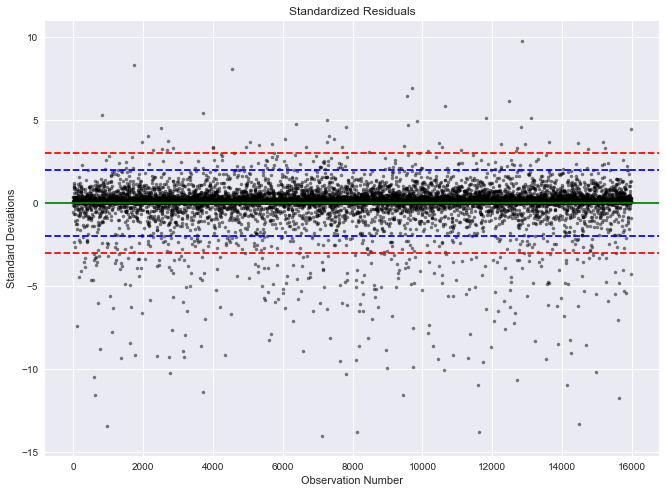

Anderson-Darling: 2696.1925915097527 Critical Value: 0.787 


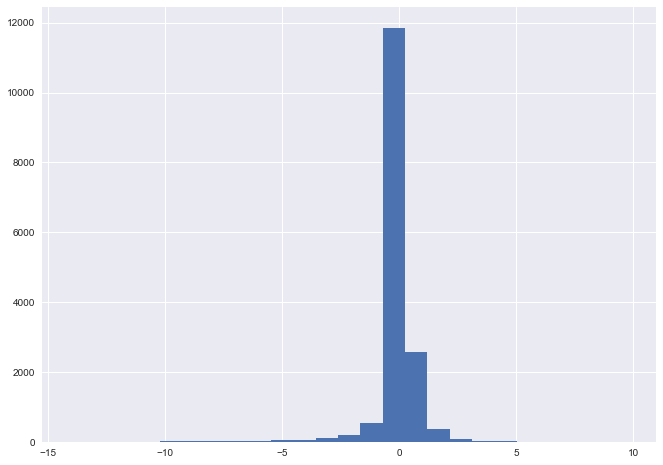

In [36]:
tfmodel = regressor
testing = pd.DataFrame({'true':test_y, 'pred':y_predicted})

testing['resid'] = testing['pred']-testing['true']
testing['stdresid'] = testing['resid']/np.std(testing['resid'])

plt.plot(testing['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

stat, cv, sig = stats.anderson(testing['stdresid'], 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))

plt.hist(testing['stdresid'], bins=25)
plt.show()

In [37]:
param_test1 = {
     'alpha': uniform(0.1, 10.0)
}


clf = RandomizedSearchCV(estimator = Ridge(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=500)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    




Parameter search took 76.24 seconds for 500 candidate parameter settings.
Best Mean validation score: -25231.788 (std: 0.115)
Parameters: {'alpha': 10.092814352446377}


In [38]:
ridgemodel = Ridge(alpha = 10.09)
ridgemodel.fit(train_X2.values, train_y)

Ridge(alpha=10.09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, ridgemodel.predict(train_X2.values)
y_true, y_pred = val_y, ridgemodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, ridgemodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))



The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.333809306077
RMSE Train: 158.25111280437181
RMSE Val: 157.64455659974615
RMSE Test: 153.37822976346325
MAE Train: 63.6672432848
MAE Val: 63.3021609518
MAE Test: 62.4280129351


In [40]:
param_test1 = {
     'alpha': uniform(0.1, 10.0),
     'l1_ratio':uniform(0.1, 0.9),
     'selection':['random']
}


clf = RandomizedSearchCV(estimator = ElasticNet(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=3,
                              n_iter=300)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    


Parameter search took 81.76 seconds for 300 candidate parameter settings.
Best Mean validation score: -25213.032 (std: 1940.687)
Parameters: {'alpha': 0.12359447399106541, 'l1_ratio': 0.46245871132626071, 'selection': 'random'}


In [42]:
elasticmodel = ElasticNet(alpha = 0.1236, l1_ratio=0.4625, selection = 'random')
elasticmodel.fit(train_X2.values, train_y)

ElasticNet(alpha=0.1236, copy_X=True, fit_intercept=True, l1_ratio=0.4625,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

In [81]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, elasticmodel.predict(train_X2.values)
y_true, y_pred = val_y, elasticmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, elasticmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))



The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.333282448383
RMSE Train: 158.31367697638356
RMSE Val: 157.52517419999643
RMSE Test: 153.28482118162066
MAE Train: 63.8423961338
MAE Val: 63.4360191197
MAE Test: 62.5598970238


In [44]:
param_test1 = {
     'alpha':uniform(0.0,1.0),
     'activation':['identity','logistic','tanh','relu'],
     'beta_1':uniform(0.0, 1.0),
     'beta_2':uniform(0.0, 1.0),
     'early_stopping':[True],
     'shuffle':[True],
     'hidden_layer_sizes':[(28, 14)],
     'learning_rate_init':[0.01, 0.001]
}


clf = RandomizedSearchCV(estimator = MLPRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=3,
                              n_iter=100)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    


Parameter search took 572.14 seconds for 100 candidate parameter settings.
Best Mean validation score: -24786.649 (std: 2466.700)
Parameters: {'activation': 'relu', 'alpha': 0.1476185055791519, 'beta_1': 0.12677777487204644, 'beta_2': 0.40210268320395159, 'early_stopping': True, 'hidden_layer_sizes': (28, 14), 'learning_rate_init': 0.01, 'shuffle': True}


In [45]:
pms = clf.best_params_


mlpmodel = MLPRegressor(activation=pms['activation'],
                        alpha=pms['alpha'],
                        beta_1=pms['beta_1'],
                        beta_2=pms['beta_2'],
                        early_stopping=pms['early_stopping'],
                        hidden_layer_sizes=pms['hidden_layer_sizes'],
                        learning_rate_init=pms['learning_rate_init'],
                        shuffle=pms['shuffle'])
mlpmodel.fit(train_X2.values, train_y)

MLPRegressor(activation='relu', alpha=0.1476185055791519, batch_size='auto',
       beta_1=0.12677777487204644, beta_2=0.40210268320395159,
       early_stopping=True, epsilon=1e-08, hidden_layer_sizes=(28, 14),
       learning_rate='constant', learning_rate_init=0.01, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [82]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, mlpmodel.predict(train_X2.values)
y_true, y_pred = val_y, mlpmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, mlpmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))



The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.357498459727
RMSE Train: 155.41201034492877
RMSE Val: 154.70088015584173
RMSE Test: 151.14029007613064
MAE Train: 60.4556172303
MAE Val: 60.2606065929
MAE Test: 59.3082337787


In [47]:
nnet_res = list()

for i in range(1, 31):
    
    mlpmodel = MLPRegressor(hidden_layer_sizes=(i,))
    mlpmodel.fit(train_X2.values, train_y)

    y_true, y_pred = val_y, mlpmodel.predict(val_X[collist_X2].values)

    #print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    nnet_res.append(rmse)
    



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


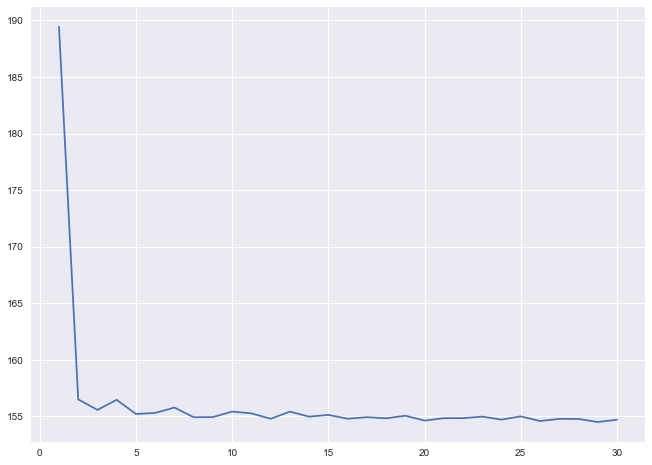

In [48]:
x=np.array(range(1,31))
y = np.array(nnet_res)
plt.plot(x, y)
plt.show()

In [49]:
param_test1 = {
     'C':uniform(0.0,1.0),
     'epsilon': uniform(0.0, 1.0),
     'loss':['squared_epsilon_insensitive', 'epsilon_insensitive']
}


clf = RandomizedSearchCV(estimator = LinearSVR(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=3,
                              n_iter=200)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    


Parameter search took 411.26 seconds for 200 candidate parameter settings.
Best Mean validation score: -25194.894 (std: 2564.296)
Parameters: {'C': 0.50939769946983404, 'epsilon': 0.75070706427464995, 'loss': 'squared_epsilon_insensitive'}


In [52]:
lsvrmodel = LinearSVR(C=0.509, epsilon=0.7507, loss='squared_epsilon_insensitive')
lsvrmodel.fit(train_X2.values, train_y)

LinearSVR(C=0.509, dual=True, epsilon=0.7507, fit_intercept=True,
     intercept_scaling=1.0, loss='squared_epsilon_insensitive',
     max_iter=1000, random_state=None, tol=0.0001, verbose=0)

In [83]:
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, lsvrmodel.predict(train_X2.values)
y_true, y_pred = val_y, lsvrmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, lsvrmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))



The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.33338470807
RMSE Train: 158.3015356072202
RMSE Val: 157.77842836718017
RMSE Test: 153.60546993395184
MAE Train: 63.6716509825
MAE Val: 63.3336464049
MAE Test: 62.5152695831


In [54]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': val_X[collist_X2].values}, y=val_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
tfpred = y_predicted.reshape(val_y.shape)


test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={'x': test_X[collist_X2].values}, y=test_y, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['predictions'] for p in predictions))
tf_test = y_predicted.reshape(test_y.shape)


xgbpred = xgbmodel.predict(val_X[collist_X2].values)
elasticpred = elasticmodel.predict(val_X[collist_X2].values)
lassopred = ridgemodel.predict(val_X[collist_X2].values)
mlppred = mlpmodel.predict(val_X[collist_X2].values)
lsvrpred = lsvrmodel.predict(val_X[collist_X2].values)
lgbmpred = lgbmmodel.predict(val_X[collist_X2].values)

resarray = np.array([val_y, xgbpred, elasticpred, lassopred, mlppred, lsvrpred, lgbmpred, tfpred], np.float64)

xgb_test = xgbmodel.predict(test_X[collist_X2].values)
elastic_test = elasticmodel.predict(test_X[collist_X2].values)
lasso_test = ridgemodel.predict(test_X[collist_X2].values)
mlp_test = mlpmodel.predict(test_X[collist_X2].values)
lsvr_test = lsvrmodel.predict(test_X[collist_X2].values)
lgbm_test = lgbmmodel.predict(test_X[collist_X2].values)

res_test = np.array([test_y, xgb_test, elastic_test, lasso_test, mlp_test, lsvr_test, lgbm_test, tf_test], np.float64)

result = pd.DataFrame(resarray.transpose(), columns = ['true_y','xgbpred', 'elasticpred','ridgepred', 'mlppred','lsvrpred','lgbmpred','tfpred'])
result_test = pd.DataFrame(res_test.transpose(), columns = ['true_y','xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred'])


ensX = result[['xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']].values
ensy = result[['true_y']].values

finX = result_test[['xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']].values
finy = result_test[['true_y']].values

INFO:tensorflow:Restoring parameters from C:\Temp\tmpkq4z6wc7\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpkq4z6wc7\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpkq4z6wc7\model.ckpt-10000


INFO:tensorflow:Restoring parameters from C:\Temp\tmpkq4z6wc7\model.ckpt-10000


In [55]:
result_test['avg'] = (result_test['xgbpred']+result_test['elasticpred']+result_test['ridgepred']+result_test['mlppred']+result_test['lsvrpred']+result_test['lgbmpred']+result_test['tfpred'])/7
result_test['std'] = result_test[['xgbpred','elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']].std(axis=1)
result_test.head()

,true_y,xgbpred,elasticpred,ridgepred,mlppred,lsvrpred,lgbmpred,tfpred,avg,std
0,34.12,8.595943,12.066313,11.508841,11.893818,10.776601,12.818974,11.944002,11.372070,1.369611
1,0.00,8.843944,7.258428,6.888712,6.731425,6.376538,12.860172,6.628863,7.941155,2.317293
2,0.00,42.690308,62.506416,70.133828,70.315541,68.985746,40.651147,53.928410,58.458771,12.847637
3,205.89,80.726143,92.394083,88.346699,105.072617,86.535356,84.211439,120.914124,94.028637,14.196467
4,0.00,11.209170,20.464955,19.729260,18.063179,19.385743,15.541121,11.119654,16.501869,3.974512


In [56]:
result_test2 = result_test.sort_values(by='true_y').reset_index()

print('R2 Train: ' + str(r2_score(result_test2['true_y'],result_test2['avg'])))
rmse = math.sqrt(mean_squared_error(result_test2['true_y'],result_test2['avg']))
print('RMSE Train: ' + str(rmse))

R2 Train: 0.326250907913
RMSE Train: 150.85501675076466


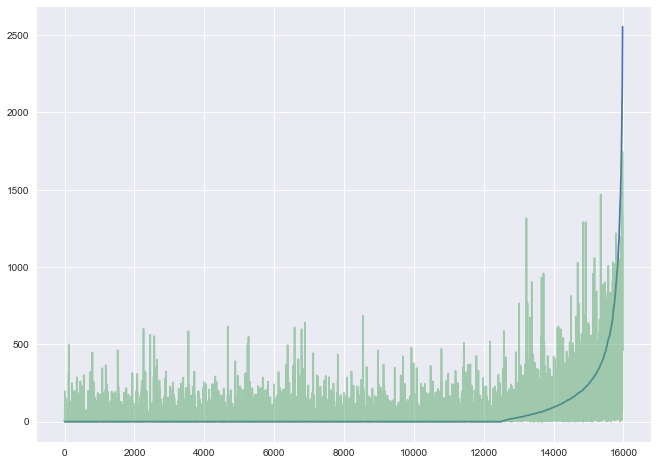

In [57]:
plt.plot(result_test2['true_y'])
plt.plot(result_test2['avg'], alpha=0.5)
plt.show()

xgbpred


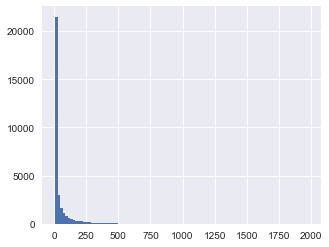

elasticpred


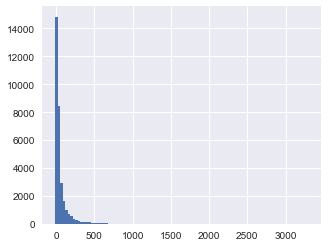

ridgepred


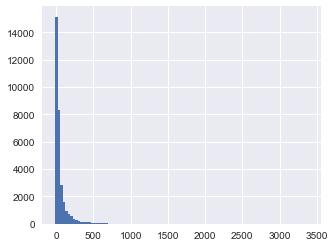

mlppred


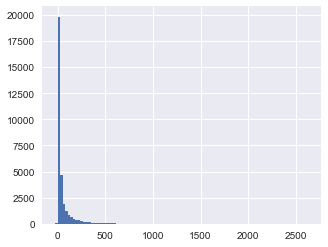

lsvrpred


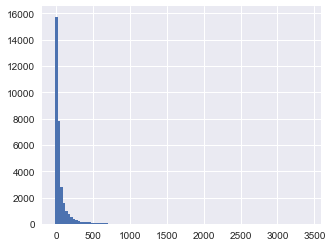

lgbmpred


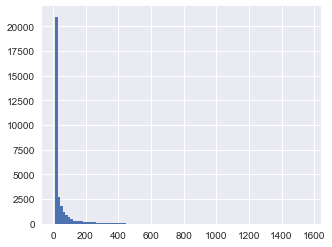

tfpred


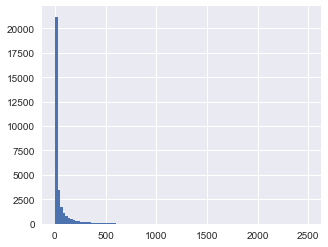

In [58]:
matplotlib.rcParams['figure.figsize'] = (5,4)
lst = ['xgbpred', 'elasticpred','ridgepred','mlppred','lsvrpred','lgbmpred','tfpred']

for var in range(len(lst)):
    print(lst[var])
    plt.hist(ensX[:, var], bins = 100)
    plt.show()
    
    
    
matplotlib.rcParams['figure.figsize'] = (11,8)

In [59]:
param_test1 = {
     'learning_rate':[0.01],
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:linear'],
     'gamma': uniform(0.1,0.9)
}

fit_params = {
    'early_stopping_rounds':[50],
    'eval_set':[(finX, finy)],
    'eval_metric':['rmse']
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=100,
                              cv=5,
                              fit_params = fit_params)
start = time()
gsearch1.fit(ensX, ensy,
            )

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)    

[0]	validation_0-rmse:190.011
Will train until validation_0-rmse hasn't improved in [50] rounds.
[1]	validation_0-rmse:189.292
[2]	validation_0-rmse:188.586
[3]	validation_0-rmse:187.897
[4]	validation_0-rmse:187.243
[5]	validation_0-rmse:186.594
[6]	validation_0-rmse:185.923
[7]	validation_0-rmse:185.271
[8]	validation_0-rmse:184.623
[9]	validation_0-rmse:184
[10]	validation_0-rmse:183.406
[11]	validation_0-rmse:182.8
[12]	validation_0-rmse:182.193
[13]	validation_0-rmse:181.605
[14]	validation_0-rmse:181.016
[15]	validation_0-rmse:180.479
[16]	validation_0-rmse:179.932
[17]	validation_0-rmse:179.37
[18]	validation_0-rmse:178.848
[19]	validation_0-rmse:178.324
[20]	validation_0-rmse:177.808
[21]	validation_0-rmse:177.313
[22]	validation_0-rmse:176.816
[23]	validation_0-rmse:176.347
[24]	validation_0-rmse:175.846
[25]	validation_0-rmse:175.359
[26]	validation_0-rmse:174.891
[27]	validation_0-rmse:174.423
[28]	validation_0-rmse:173.957
[29]	validation_0-rmse:173.514
[30]	validation_0-rm

In [60]:
mp = gsearch1.best_params_
mp

{'colsample_bytree': 0.81392609944154359,
 'gamma': 0.20910082043397249,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 8,
 'objective': 'reg:linear',
 'reg_alpha': 0.92282151697469328,
 'reg_lambda': 0.10264817666420244,
 'subsample': 0.62160997697276321}

In [63]:
#max_depth = 10
#min_child_weight = 1
#colsample_bytree = 0.7
#subsample = 1.0

metaxgb = xgb.XGBRegressor( 
                        learning_rate = mp['learning_rate'],
                        n_estimators = 337,
                        max_depth = mp['max_depth'],
                        min_child_weight = mp['min_child_weight'],
                        subsample = mp['subsample'],
                        colsample_bytree = mp['colsample_bytree'],
                        objective = mp['objective'],
                        reg_alpha= mp['reg_alpha'],
                        reg_lambda = mp['reg_lambda'],
                        gamma = mp['gamma'],
                        seed = 27)
metaxgb.fit(ensX, ensy, 
                 eval_set=[(finX, finy)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

print(metaxgb.best_iteration, metaxgb.best_score)

[0]	validation_0-rmse:190.025
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:189.35
[2]	validation_0-rmse:188.675
[3]	validation_0-rmse:187.966
[4]	validation_0-rmse:187.291
[5]	validation_0-rmse:186.624
[6]	validation_0-rmse:185.967
[7]	validation_0-rmse:185.297
[8]	validation_0-rmse:184.65
[9]	validation_0-rmse:184.027
[10]	validation_0-rmse:183.445
[11]	validation_0-rmse:182.872
[12]	validation_0-rmse:182.274
[13]	validation_0-rmse:181.697
[14]	validation_0-rmse:181.081
[15]	validation_0-rmse:180.523
[16]	validation_0-rmse:179.95
[17]	validation_0-rmse:179.416
[18]	validation_0-rmse:178.855
[19]	validation_0-rmse:178.349
[20]	validation_0-rmse:177.846
[21]	validation_0-rmse:177.345
[22]	validation_0-rmse:176.849
[23]	validation_0-rmse:176.363
[24]	validation_0-rmse:175.899
[25]	validation_0-rmse:175.413
[26]	validation_0-rmse:174.958
[27]	validation_0-rmse:174.493
[28]	validation_0-rmse:174.064
[29]	validation_0-rmse:173.638
[30]	validation_0

[259]	validation_0-rmse:150.652
[260]	validation_0-rmse:150.651
[261]	validation_0-rmse:150.658
[262]	validation_0-rmse:150.655
[263]	validation_0-rmse:150.65
[264]	validation_0-rmse:150.645
[265]	validation_0-rmse:150.642
[266]	validation_0-rmse:150.63
[267]	validation_0-rmse:150.635
[268]	validation_0-rmse:150.633
[269]	validation_0-rmse:150.622
[270]	validation_0-rmse:150.605
[271]	validation_0-rmse:150.611
[272]	validation_0-rmse:150.605
[273]	validation_0-rmse:150.622
[274]	validation_0-rmse:150.622
[275]	validation_0-rmse:150.633
[276]	validation_0-rmse:150.639
[277]	validation_0-rmse:150.631
[278]	validation_0-rmse:150.631
[279]	validation_0-rmse:150.632
[280]	validation_0-rmse:150.631
[281]	validation_0-rmse:150.635
[282]	validation_0-rmse:150.628
[283]	validation_0-rmse:150.625
[284]	validation_0-rmse:150.629
[285]	validation_0-rmse:150.63
[286]	validation_0-rmse:150.625
[287]	validation_0-rmse:150.624
[288]	validation_0-rmse:150.625
[289]	validation_0-rmse:150.627
[290]	valid

In [64]:
y_true, y_pred = ensy, metaxgb.predict(ensX)
y_true2, y_pred2 = finy, metaxgb.predict(finX)
# y_true = inv_boxcox(y_true, lmda)
# y_pred = inv_boxcox(y_pred, lmda)
# y_true2 = inv_boxcox(y_true2, lmda)
# y_pred2 = inv_boxcox(y_pred2, lmda)
print('R2 Train: ' + str(r2_score(y_true, y_pred)))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Train: ' + str(rmse))
mae = mean_absolute_error(y_true, y_pred)
print('MAE Train: ', mae)
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Val: ' + str(rmse))
mae = mean_absolute_error(y_true2, y_pred2)
print('MAE Val: ', mae)



testing = pd.DataFrame({'true':y_true2[:,0], 'pred':y_pred2})


R2 Train: 0.412312843778
RMSE Train: 144.432012891898
MAE Train:  56.454434269
RMSE Val: 150.581211546606
MAE Val:  58.057102528


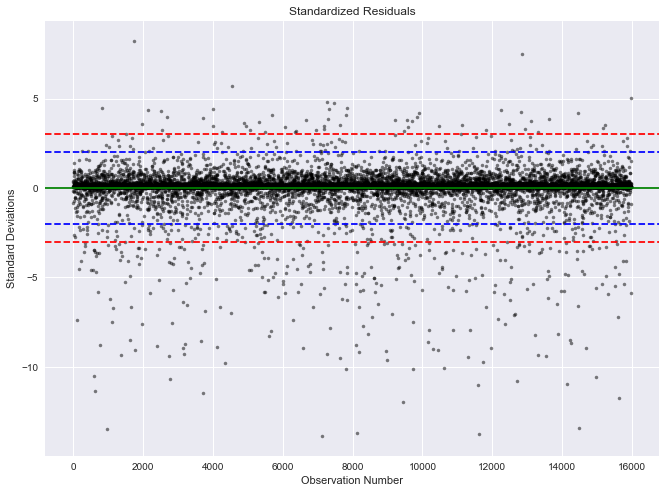

Anderson-Darling: 2814.9712349766924 Critical Value: 0.787 


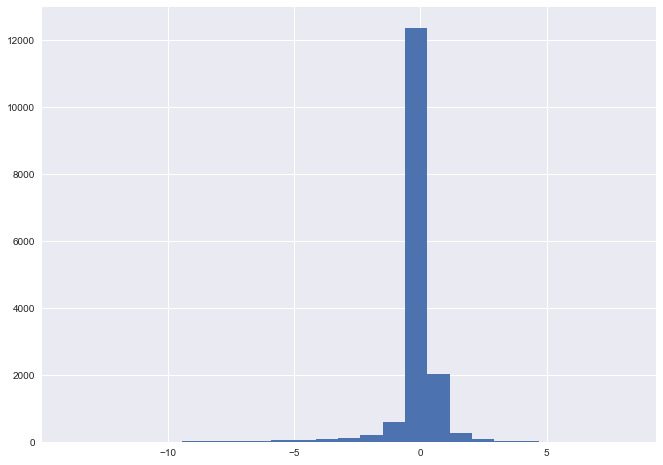

In [65]:

testing['resid'] = testing['pred']-testing['true']
testing['stdresid'] = testing['resid']/np.std(testing['resid'])

plt.plot(testing['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

stat, cv, sig = stats.anderson(testing['stdresid'], 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))

plt.hist(testing['stdresid'], bins=25)
plt.show()


In [66]:
train_y.shape, val_y.shape, test_y.shape

((31953,), (31954,), (15977,))

In [68]:
testing['decile'] = pd.qcut(testing['pred'], 10, labels=False)
testing.to_csv('predictiontesting.csv')                        

In [70]:
testing.head()

,pred,true,resid,stdresid,decile
0,7.348564,34.12,-26.771436,-0.177793,2
1,6.790408,0.00,6.790408,0.045096,1
2,52.349049,0.00,52.349049,0.347658,7
3,81.302559,205.89,-124.587441,-0.827404,8
4,11.762297,0.00,11.762297,0.078115,4


<function matplotlib.pyplot.show>

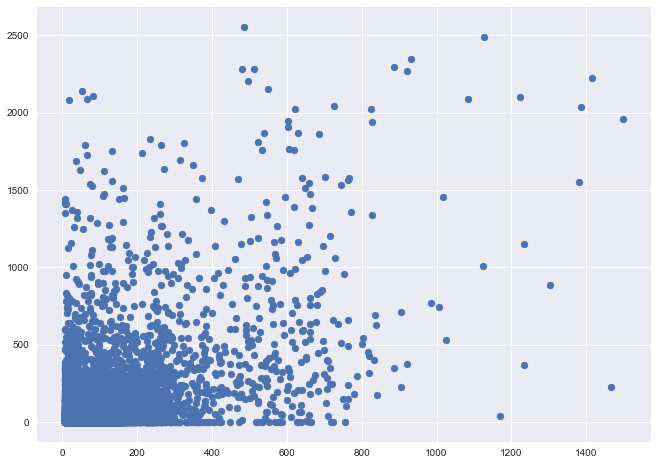

In [71]:
plt.scatter(x=testing['pred'], y=testing['true'], )
plt.show